In [220]:
import pandas as pd
import geopandas as gpd
import seaborn as sns #visualisation
import numpy as np
import scipy.spatial
import libpysal as ps
from pointpats import PointPattern, PoissonPointProcess, as_window, G, F
import matplotlib.pyplot as plt #visualisation
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
%matplotlib inline 
plt.rcParams["font.family"] = "SimHei"
sns.set(color_codes=True)

In [2]:
df = pd.read_csv('individual_phenometrics_data.csv')

In [3]:
df.head()

Dataset_ID ObservedBy_Person_ID  Site_ID   Latitude   Longitude  \
0        '8'                 '-1'      153  47.219101 -113.634499   
1        '8'                 '-1'      153  47.219101 -113.634499   
2        '8'                 '-1'      153  47.219101 -113.634499   
3        '8'                 '-1'      153  47.219101 -113.634499   
4        '8'                 '-1'      153  47.219101 -113.634499   

   Elevation_in_Meters State  Species_ID    Genus   Species  ... Tmin_Winter  \
0                 1638    MT          36  Syringa  vulgaris  ...     -9999.0   
1                 1638    MT          36  Syringa  vulgaris  ...     -9999.0   
2                 1638    MT          36  Syringa  vulgaris  ...     -9999.0   
3                 1638    MT          36  Syringa  vulgaris  ...     -9999.0   
4                 1638    MT          36  Syringa  vulgaris  ...     -9999.0   

  Tmin_Spring  Tmin_Summer  Tmin_Fall Prcp_Winter  Prcp_Spring  Prcp_Summer  \
0     -9999.0      -9999.0    -9999.0       -9999        -9999        -9999   
1     -9999.0      -9999.0    -9999.0       -9999        -9999        -9999   
2     -9999.0      -9999.0    -9999.0       -9999        -9999        -9999   
3     -9999.0      -9999.0    -9999.0       -9999        -9999        -9999   
4     -9999.0      -9999.0    -9999.0       -9999        -9999        -9999   

   Prcp_Fall  Accum_Prcp  Daylength  
0      -9999       -9999      -9999  
1      -9999       -9999      -9999  
2      -9999       -9999      -9999  
3      -9999       -9999      -9999  
4      -9999       -9999      -9999  

[5 rows x 47 columns]

In [4]:
df.describe()

Site_ID      Latitude     Longitude  Elevation_in_Meters  \
count  18403.000000  18403.000000  18403.000000         18403.000000   
mean   11077.714231     42.165314   -102.011476           914.920067   
std     7050.914524      3.903837     14.620023           676.762271   
min        2.000000     29.879999   -149.826233             0.000000   
25%     5428.000000     39.731804   -111.720001           275.000000   
50%    14008.000000     42.320000   -104.961166           793.000000   
75%    14421.000000     44.930183    -93.204987          1540.000000   
max    32471.000000     64.867546    -67.422913          4048.000000   

       Species_ID  Individual_ID  Phenophase_ID  First_Yes_Year  \
count     18403.0   18403.000000   18403.000000    18403.000000   
mean         36.0   47235.171331     208.976689     2000.450905   
std           0.0   31606.570876     133.827572       13.945269   
min          36.0      34.000000      75.000000     1980.000000   
25%          36.0   24824.000000      78.000000     1986.000000   
50%          36.0   55472.000000     205.000000     2007.000000   
75%          36.0   55898.000000     373.000000     2013.000000   
max          36.0  179328.000000     483.000000     2018.000000   

       First_Yes_Month  First_Yes_Day  ...   Tmin_Winter   Tmin_Spring  \
count     18403.000000   18403.000000  ...  18403.000000  18403.000000   
mean          4.517959      15.684943  ...  -5423.631550  -5418.732934   
std           1.215164       8.885428  ...   4977.739325   4983.068141   
min           1.000000       1.000000  ...  -9999.000000  -9999.000000   
25%           4.000000       8.000000  ...  -9999.000000  -9999.000000   
50%           4.000000      16.000000  ...  -9999.000000  -9999.000000   
75%           5.000000      23.000000  ...     -8.550000      1.940000   
max          12.000000      31.000000  ...      7.570000     11.830000   

        Tmin_Summer     Tmin_Fall   Prcp_Winter   Prcp_Spring   Prcp_Summer  \
count  18403.000000  18403.000000  18403.000000  18403.000000  18403.000000   
mean   -5413.163614  -5417.744081  -5345.050590  -5310.488562  -5296.569853   
std     4989.127131   4984.143847   5064.001683   5101.364643   5116.805334   
min    -9999.000000  -9999.000000  -9999.000000  -9999.000000  -9999.000000   
25%    -9999.000000  -9999.000000  -9999.000000  -9999.000000  -9999.000000   
50%    -9999.000000  -9999.000000  -9999.000000  -9999.000000  -9999.000000   
75%       14.240000      4.050000    110.000000    216.000000    247.000000   
max       23.770000     12.800000   1542.000000    830.000000    719.000000   

          Prcp_Fall    Accum_Prcp     Daylength  
count  18403.000000  18403.000000  18403.000000  
mean   -5322.905287  -5303.433190  16990.295550  
std     5088.008329   5110.368746  29514.057437  
min    -9999.000000  -9999.000000  -9999.000000  
25%    -9999.000000  -9999.000000  -9999.000000  
50%    -9999.000000  -9999.000000  -9999.000000  
75%      183.000000    186.000000  49075.000000  
max      846.000000   1892.000000  69120.000000  

[8 rows x 38 columns]

In [5]:
df.columns

Index(['Dataset_ID', 'ObservedBy_Person_ID', 'Site_ID', 'Latitude',
       'Longitude', 'Elevation_in_Meters', 'State', 'Species_ID', 'Genus',
       'Species', 'Common_Name', 'Kingdom', 'Individual_ID', 'Phenophase_ID',
       'Phenophase_Description', 'First_Yes_Year', 'First_Yes_Month',
       'First_Yes_Day', 'First_Yes_DOY', 'First_Yes_Julian_Date',
       'NumDays_Since_Prior_No', 'Last_Yes_Year', 'Last_Yes_Month',
       'Last_Yes_Day', 'Last_Yes_DOY', 'Last_Yes_Julian_Date',
       'NumDays_Until_Next_No', 'NumYs_in_Series', 'NumDays_in_Series',
       'Multiple_Observers', 'Multiple_FirstY',
       'Observed_Status_Conflict_Flag', 'AGDD', 'Tmax_Winter', 'Tmax_Spring',
       'Tmax_Summer', 'Tmax_Fall', 'Tmin_Winter', 'Tmin_Spring', 'Tmin_Summer',
       'Tmin_Fall', 'Prcp_Winter', 'Prcp_Spring', 'Prcp_Summer', 'Prcp_Fall',
       'Accum_Prcp', 'Daylength'],
      dtype='object')

In [19]:
cols=['Latitude','Longitude','Individual_ID', 'Phenophase_ID','First_Yes_Year','First_Yes_DOY','First_Yes_Month']

In [20]:
spa=df[cols]

In [23]:
spa=spa.loc[spa['Phenophase_ID']==76]

## Spatial distribution of yearly volunteered observational data 

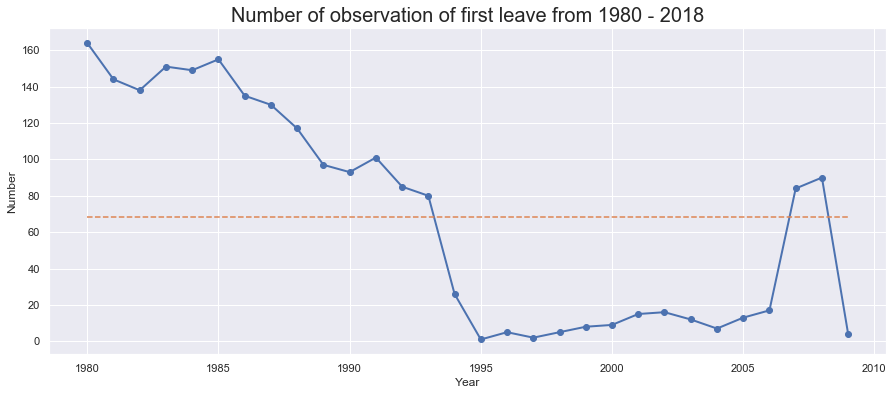

In [24]:
# 每年观测值数量
year_counts = spa['First_Yes_Year'].value_counts().sort_index()
plt.figure(figsize=(15,6))
plt.plot(year_counts,lw=2)
plt.plot(year_counts,'ro',color='b')
x = year_counts.index.tolist() # return a list of the values
y_mean = [year_counts.mean()]*year_counts.shape[0]
plt.plot(x,y_mean,'--')
plt.xlabel('Year')
plt.ylabel('Number')
plt.rc('font', family='SimHei', size=18) 
plt.title('Number of observation of first leave from 1980 - 2018',size=20)
plt.show()


C:\Anaconda\lib\site-packages\pyproj\crs\crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


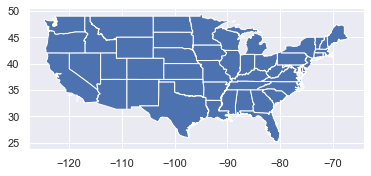

In [97]:
# display the basemap and change the projection
basemap = r"states.shp"
usa = gpd.read_file(basemap)
usa = usa.to_crs({'init': 'epsg:4326'}) 
main=usa.loc[(usa['STATE_FIPS']!= '02') & (usa['STATE_FIPS']!= '15')]
main.plot()
plt.show()

In [26]:
# create the GeoDatFrame
gdf = gpd.GeoDataFrame(main, geometry = main.geometry)
# save the GeoDataFrame
gdf.to_file(driver = 'ESRI Shapefile', filename= "mainland.shp")

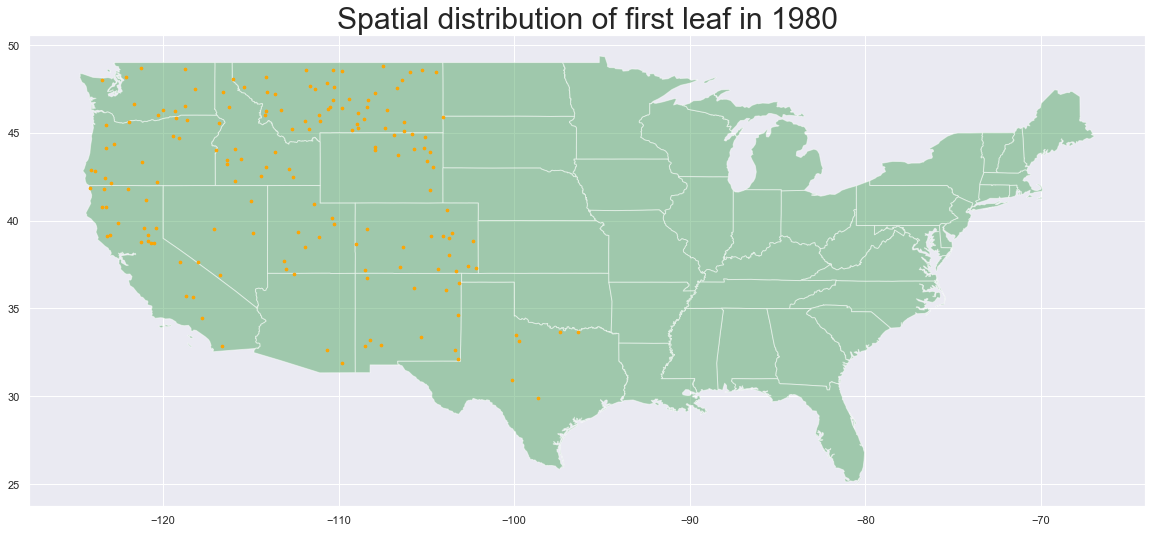

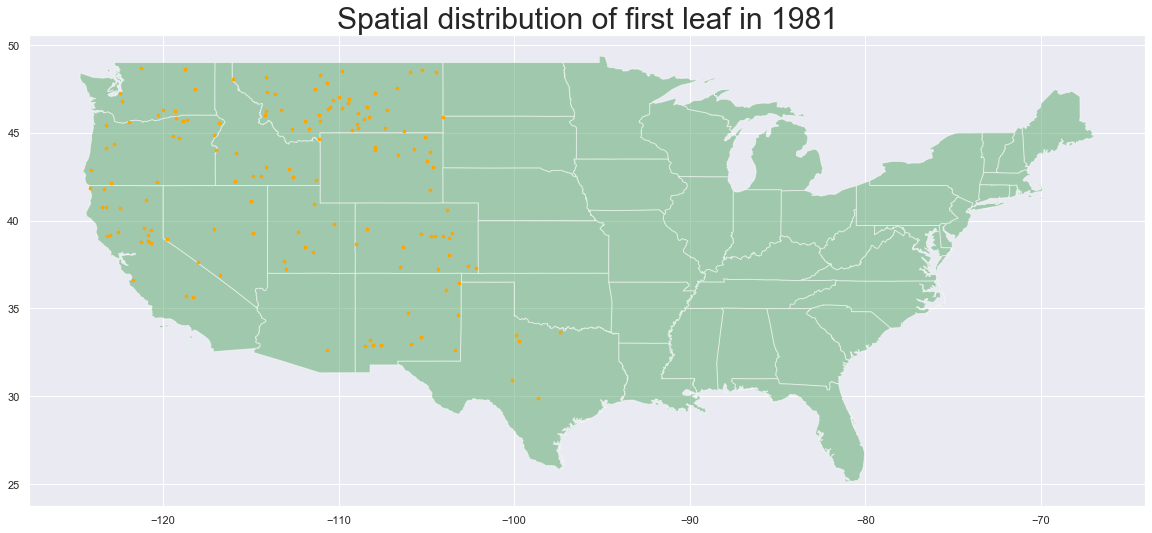

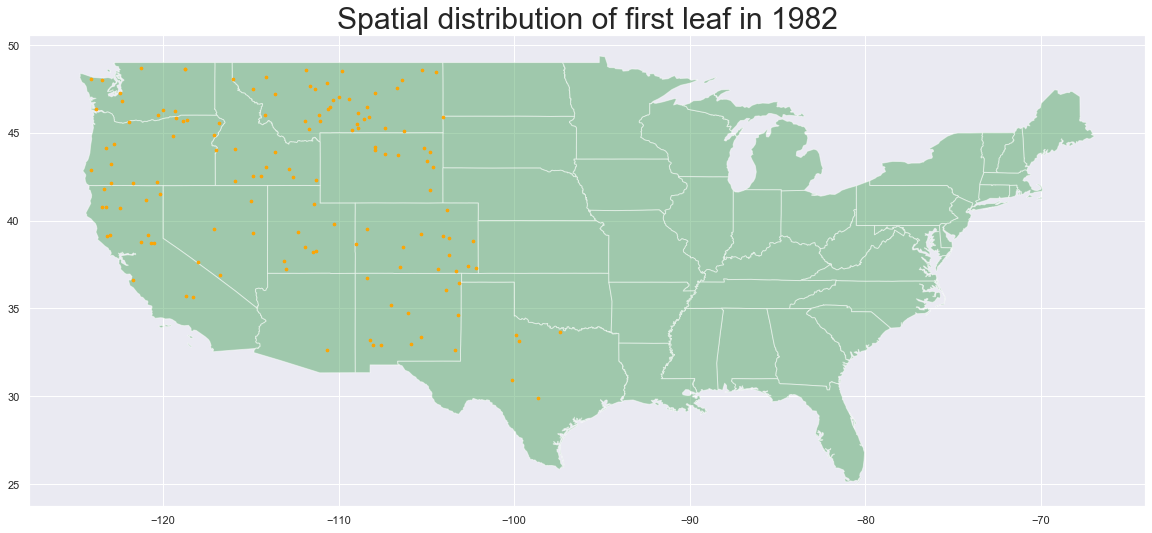

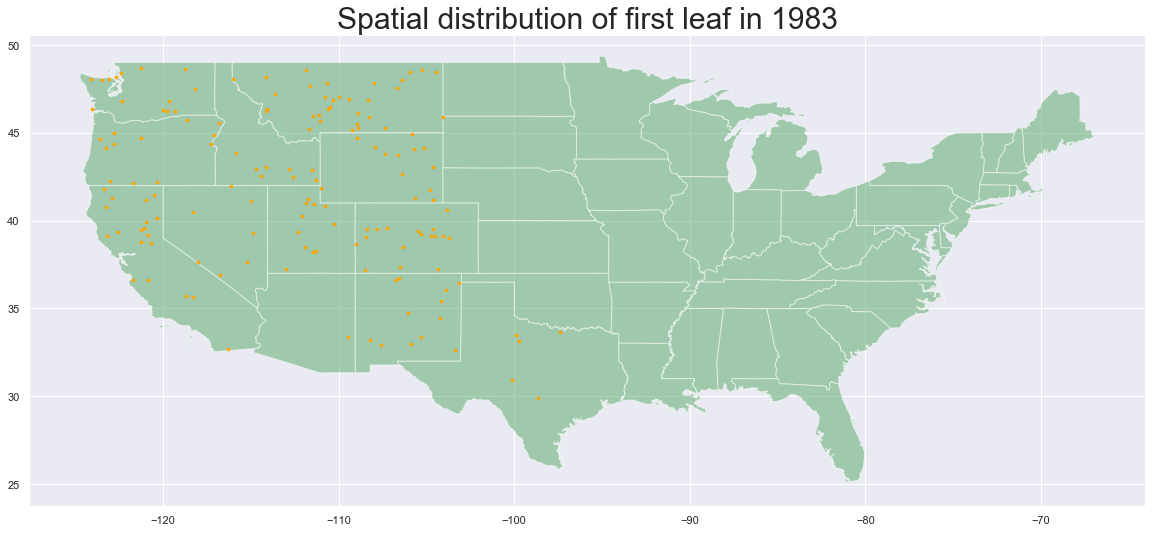

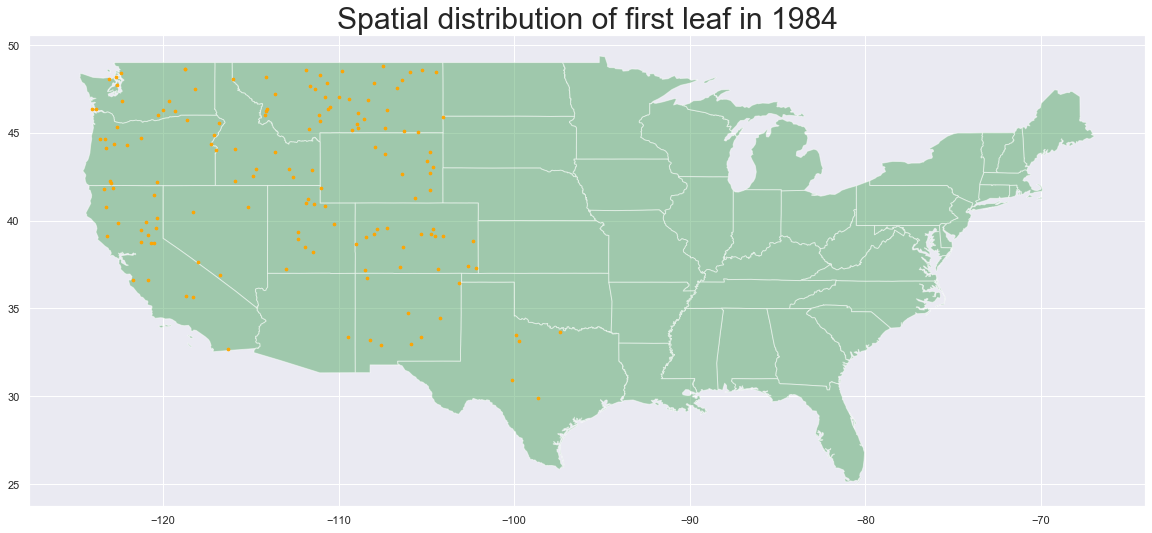

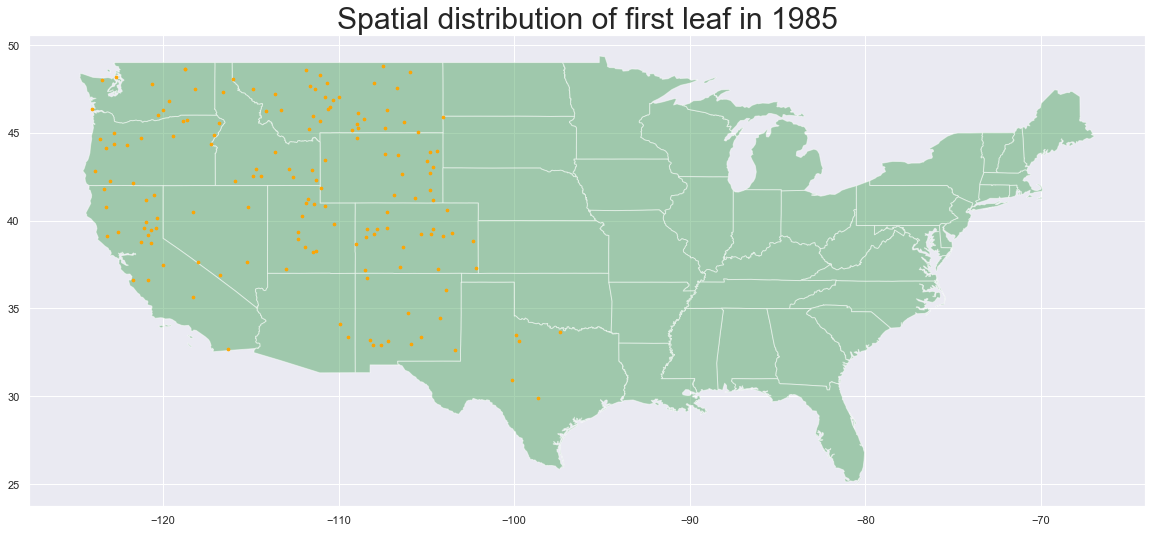

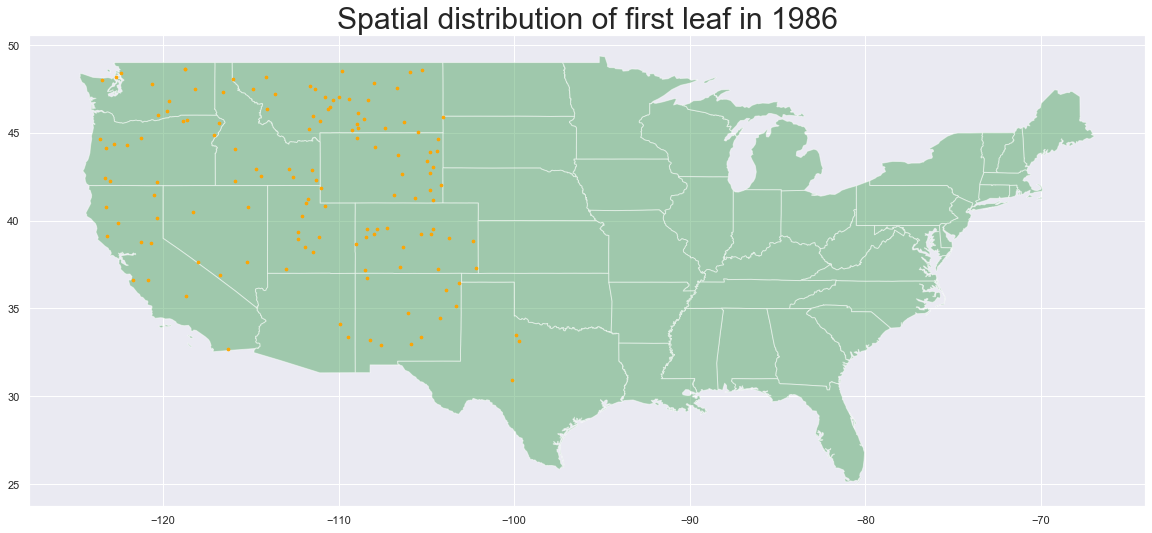

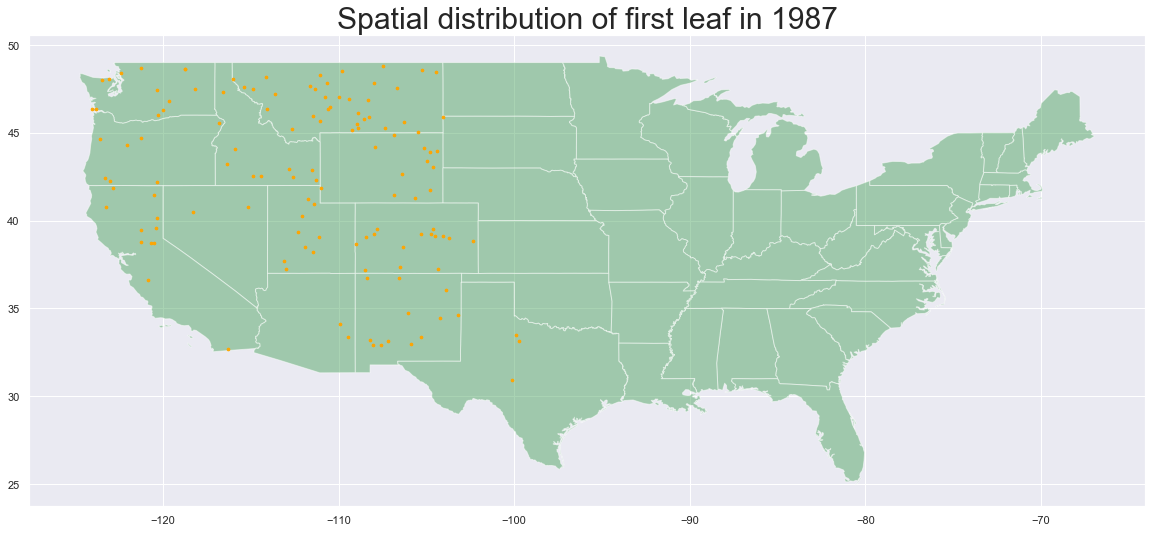

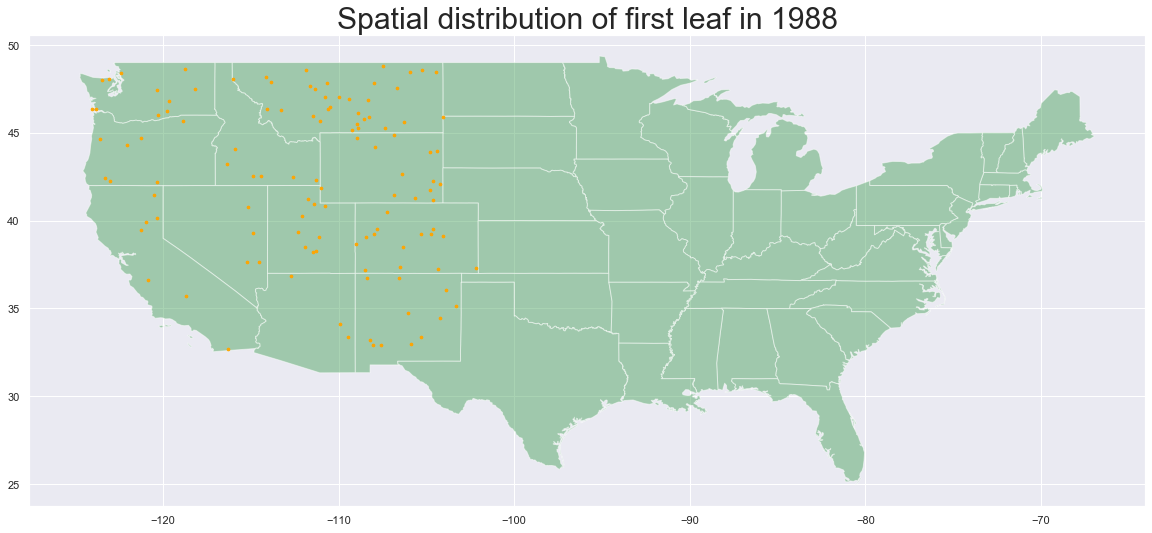

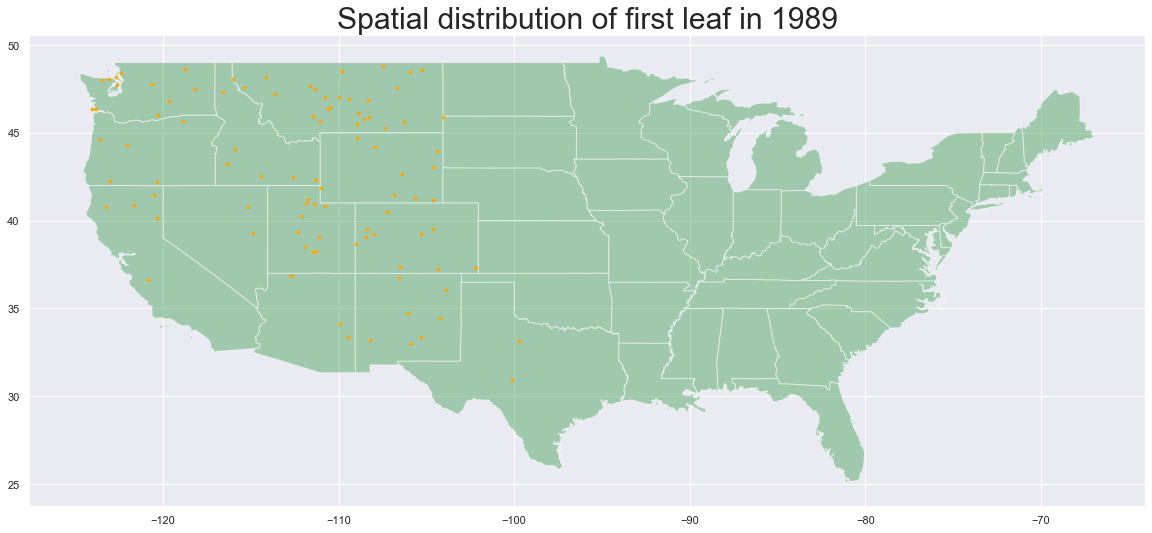

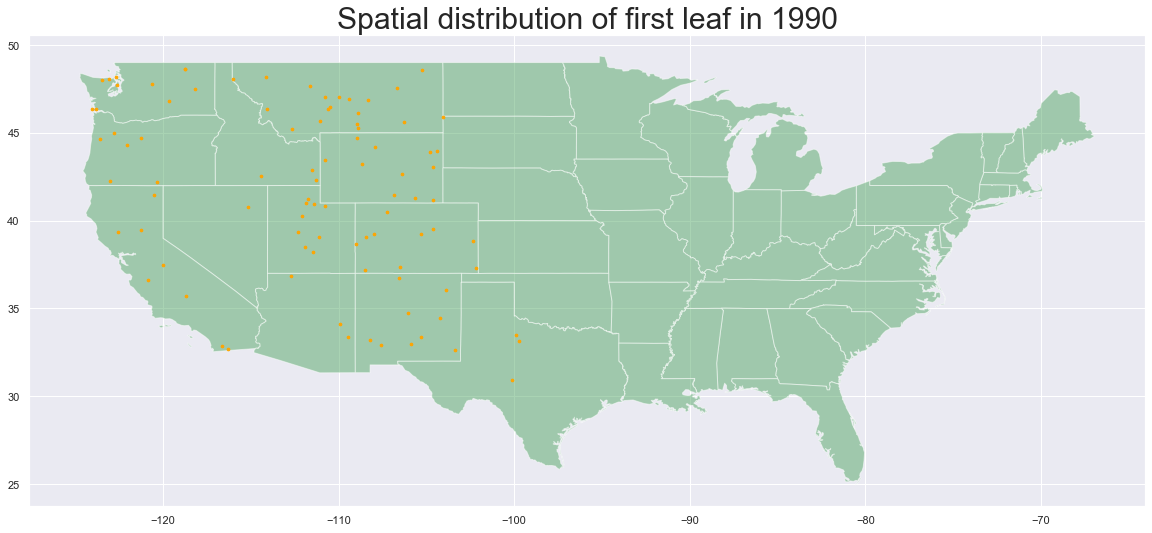

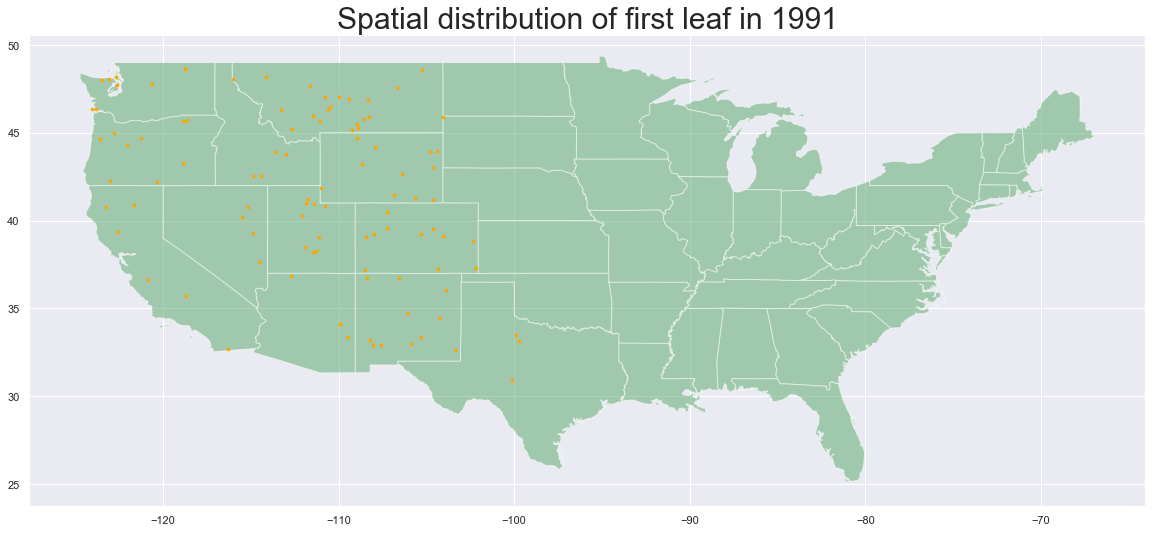

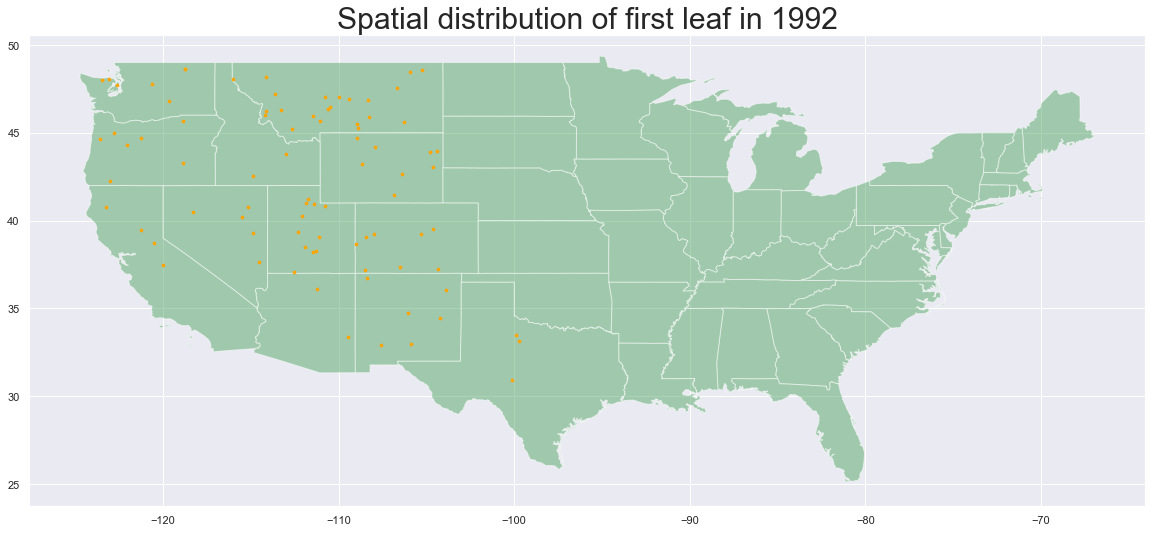

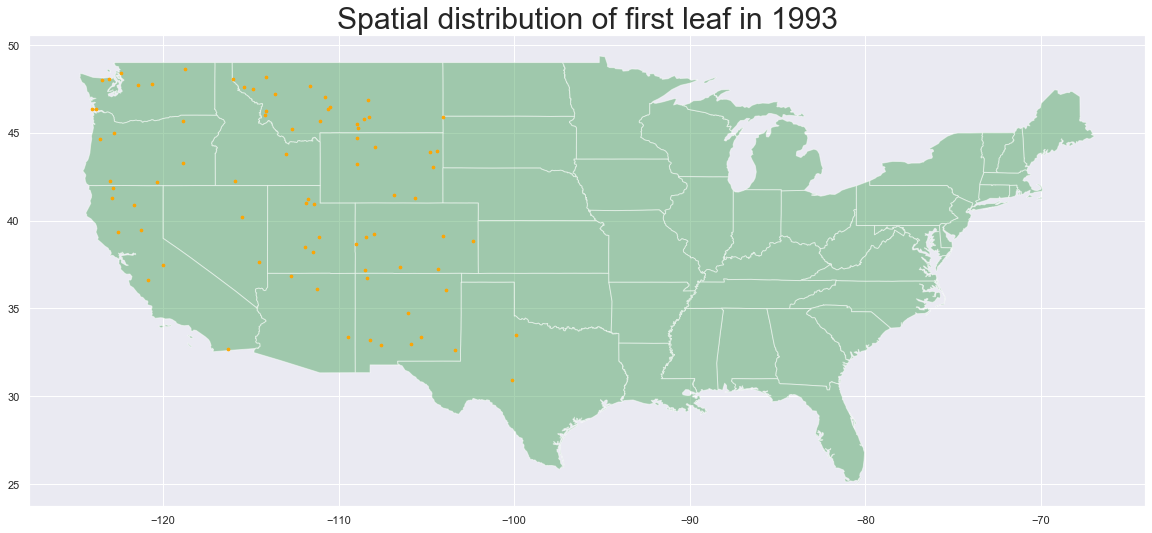

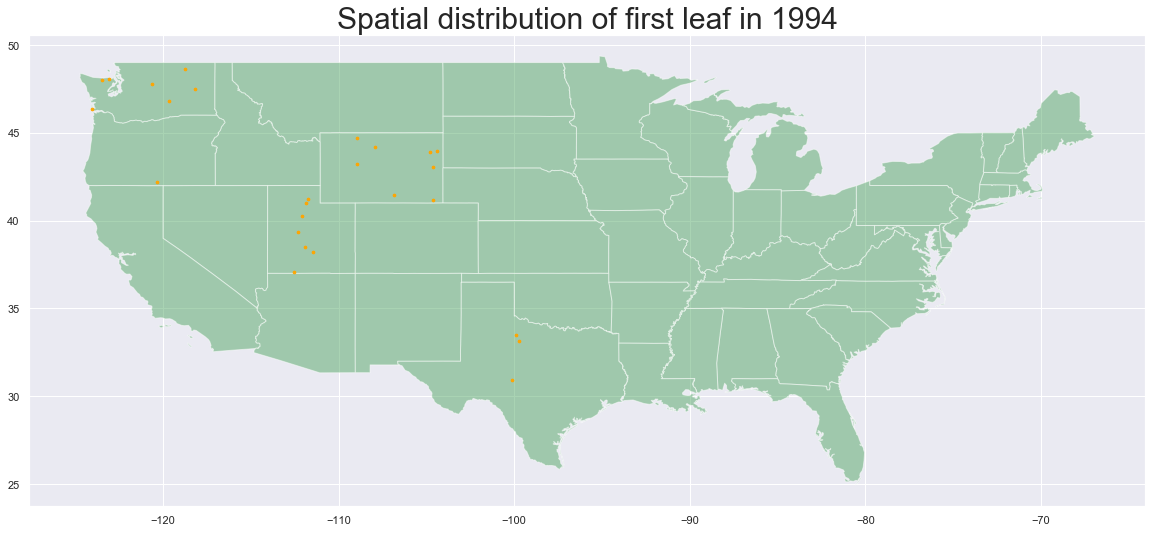

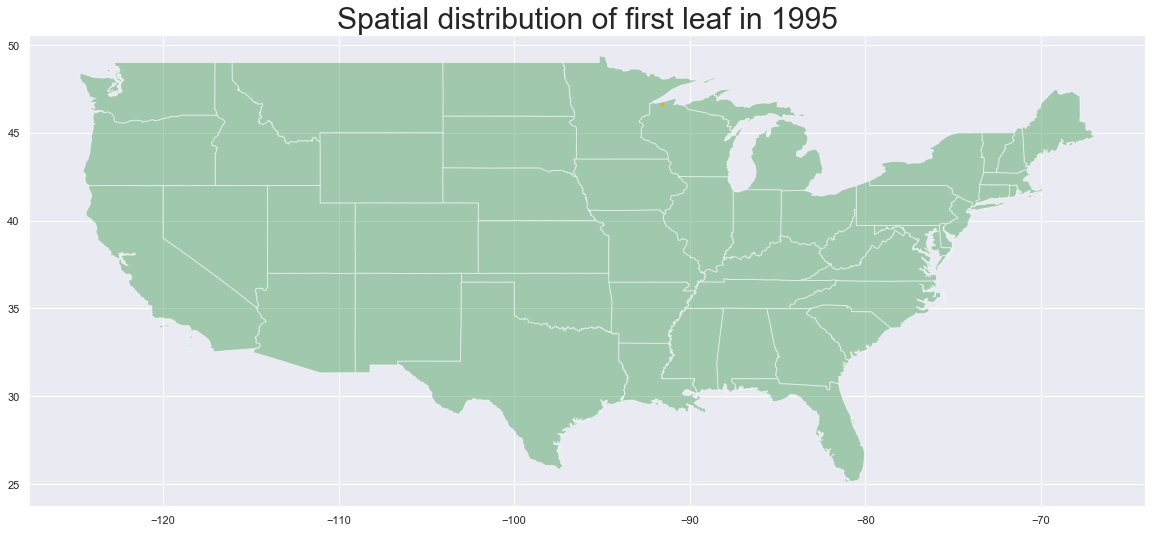

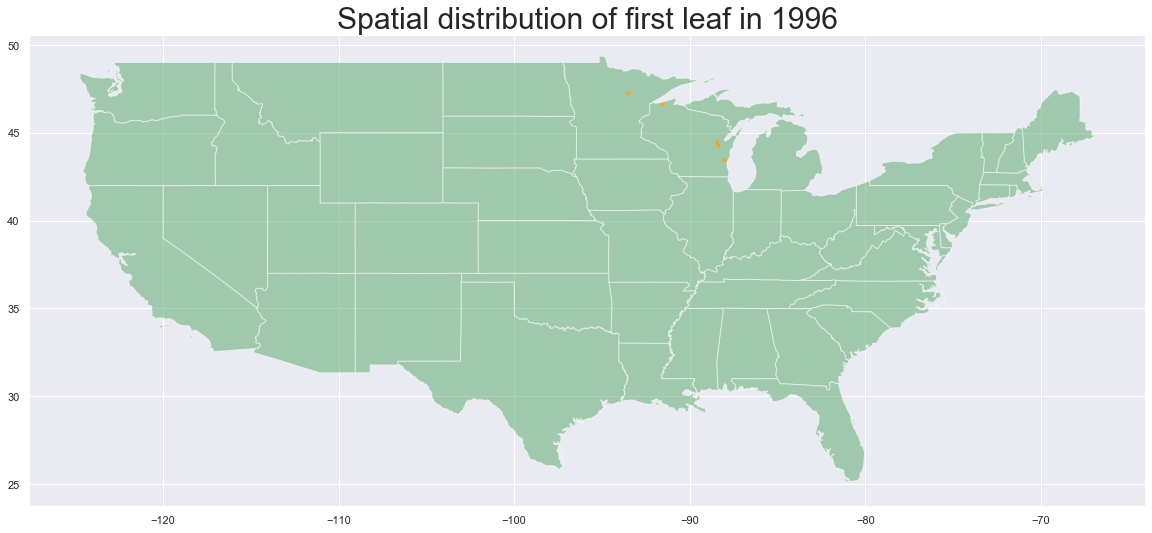

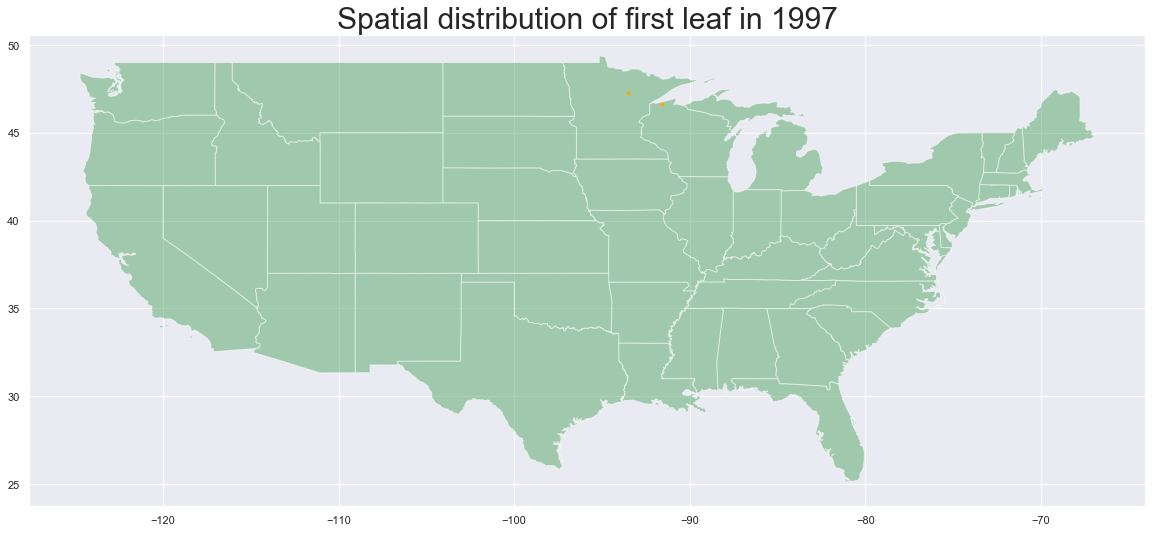

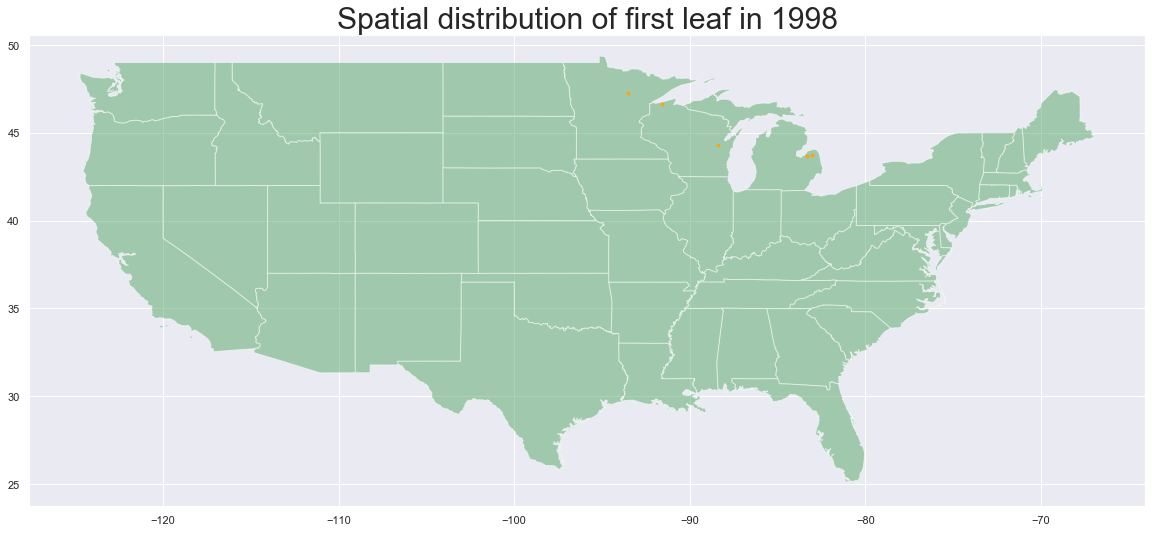

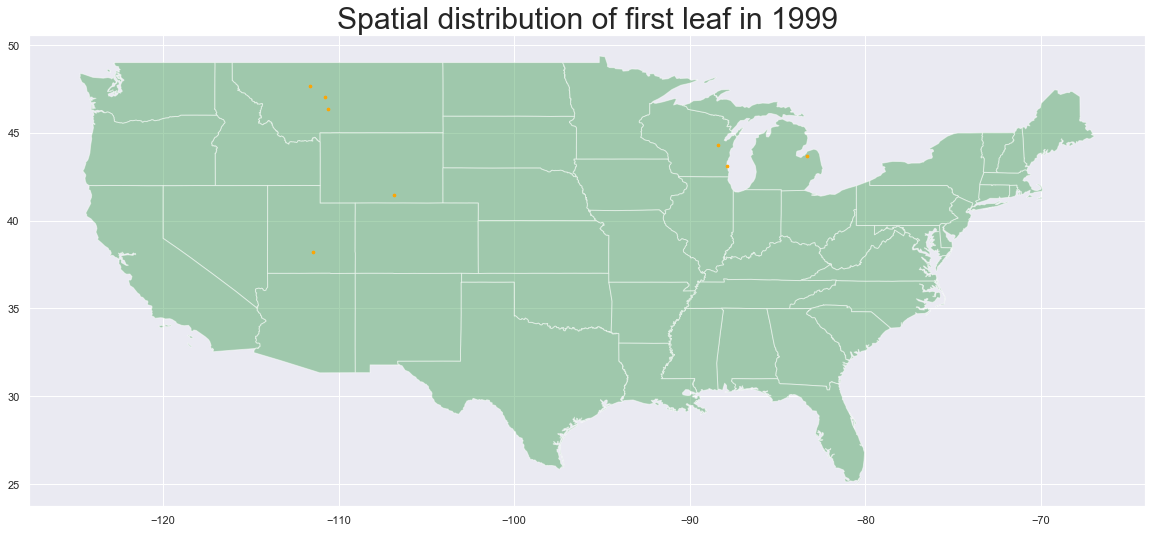

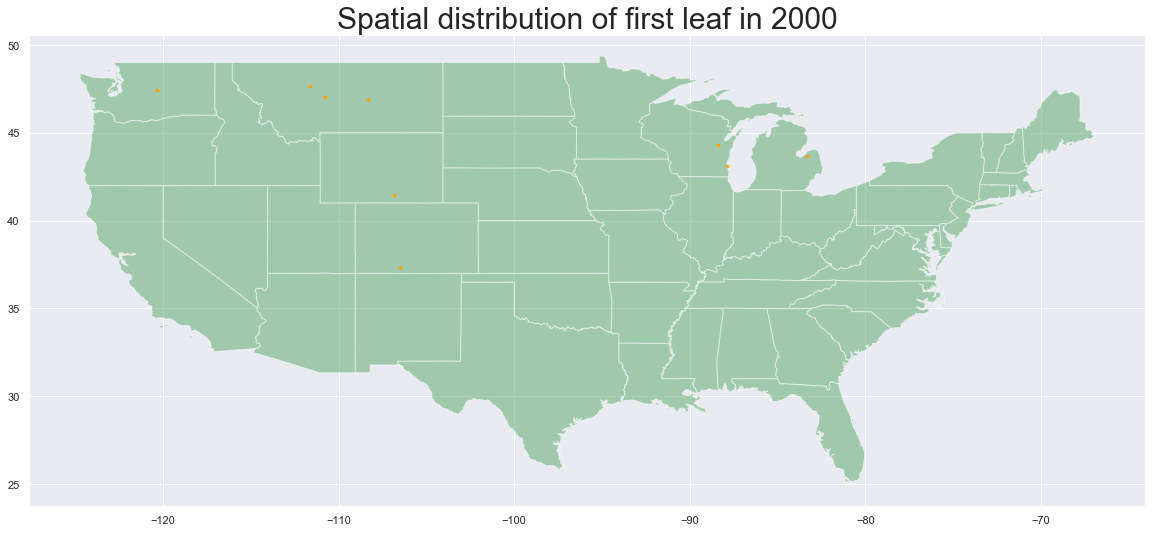

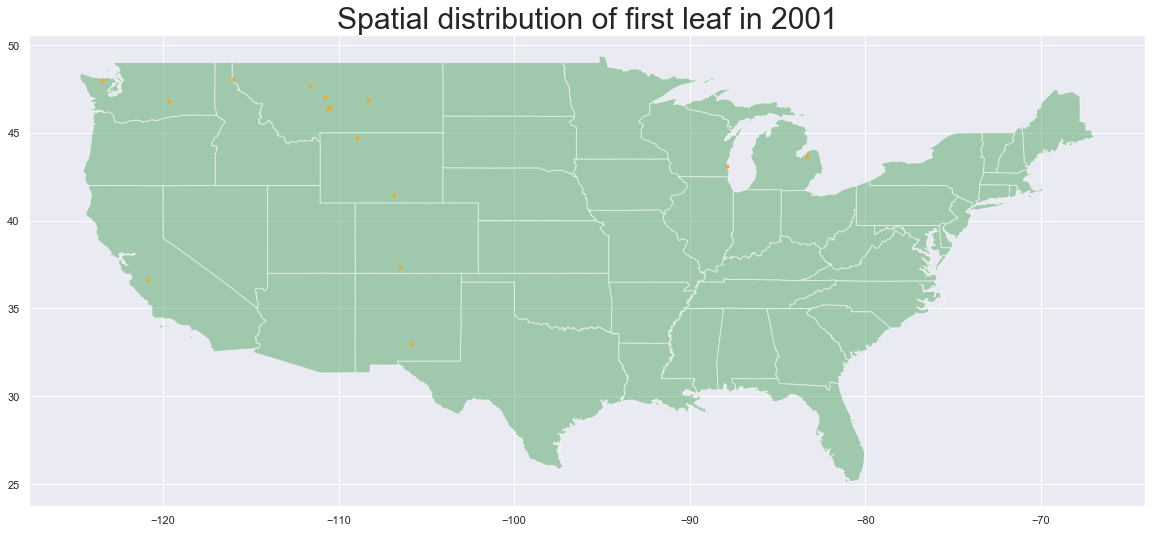

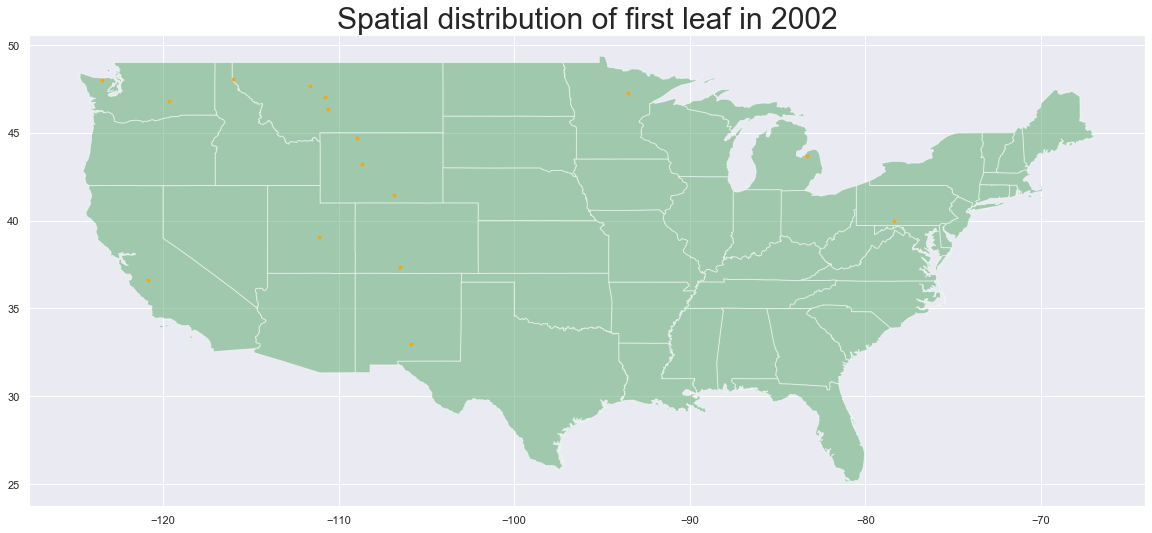

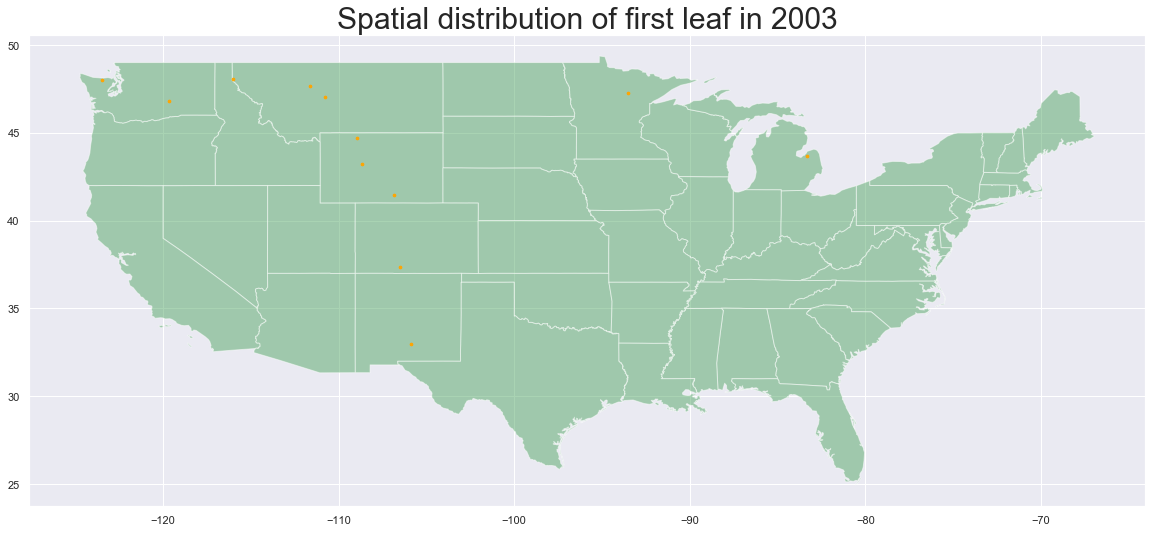

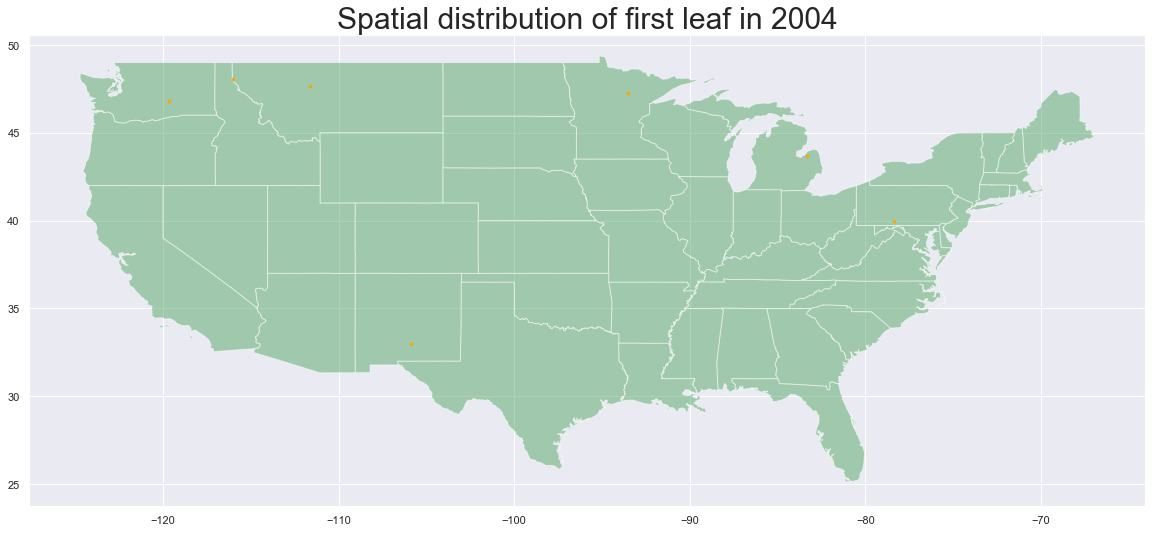

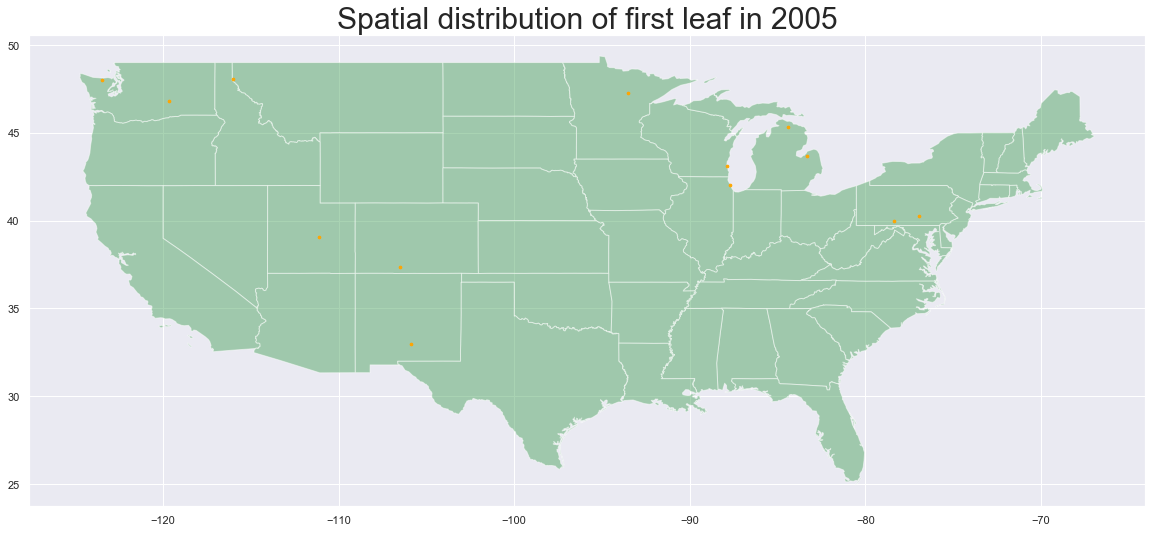

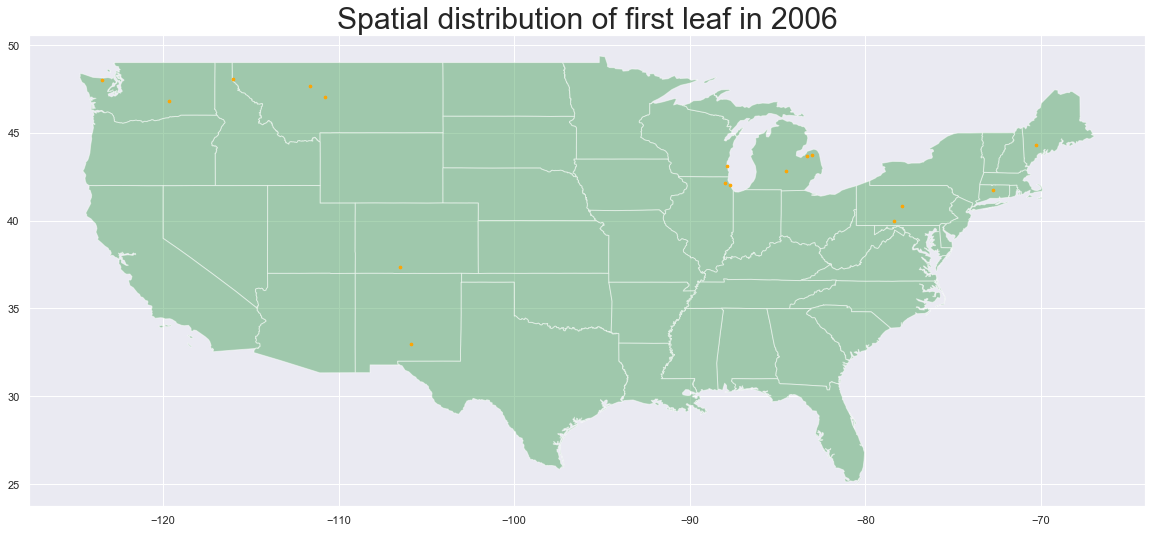

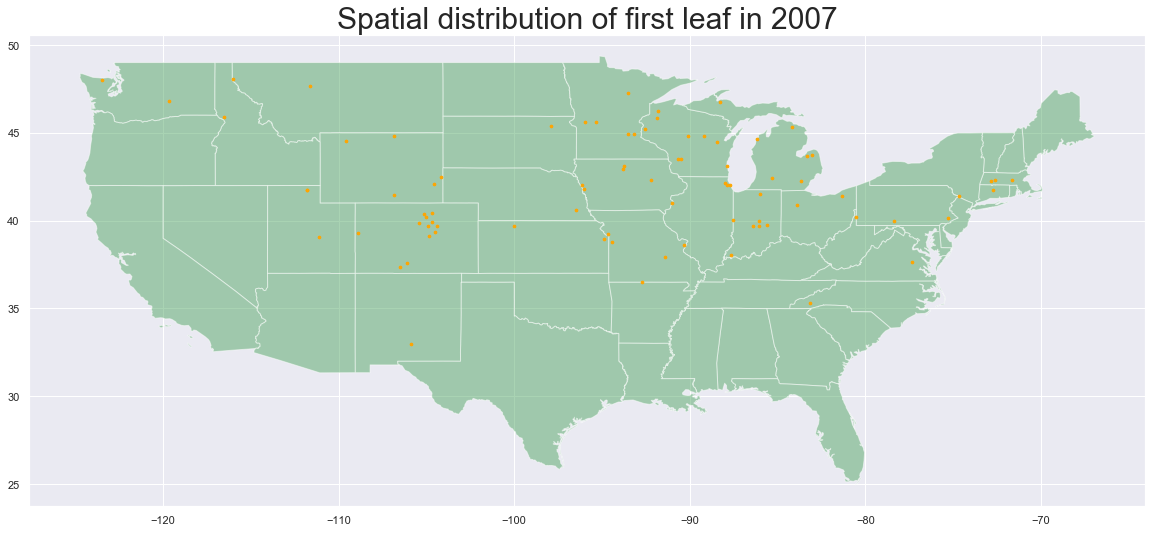

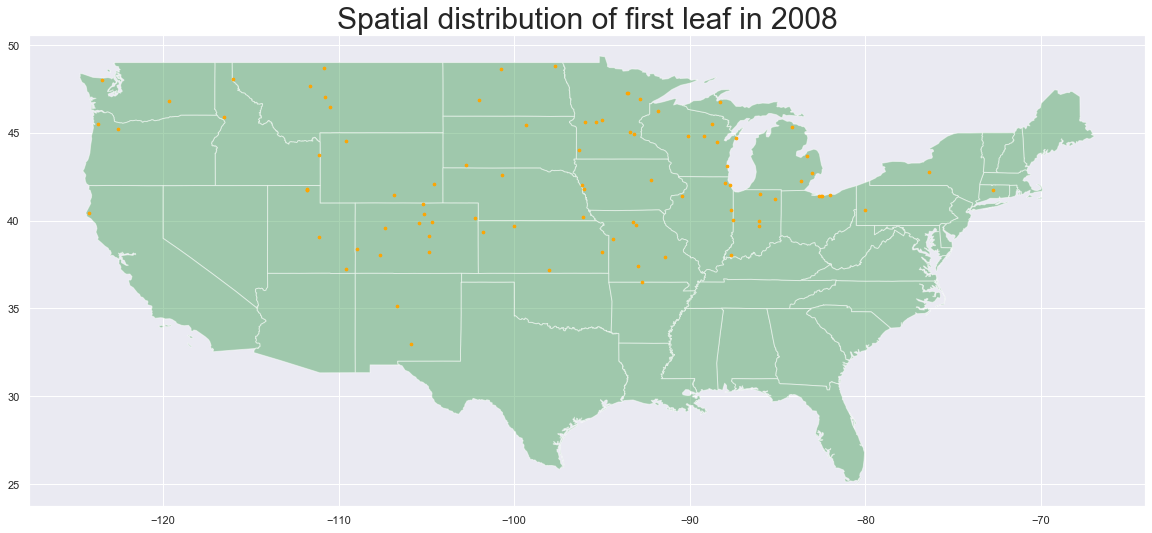

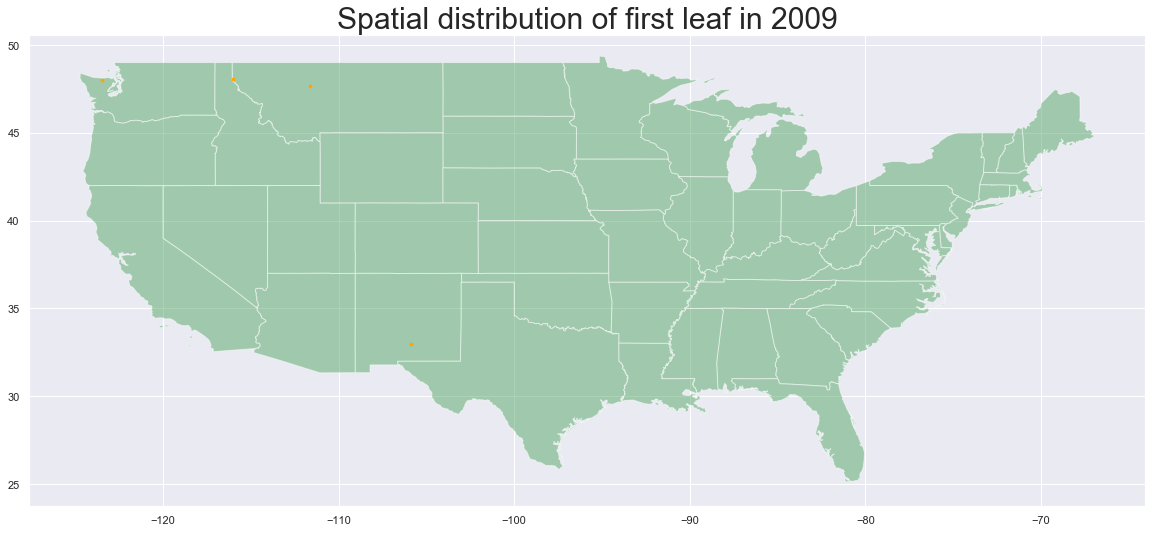

In [98]:
#def vizyearly(data,year):
    maxyear = max(spa['First_Yes_Year'])
    minyear = min(spa['First_Yes_Year'])
    for i in range(minyear,maxyear + 1):
        year = spa.loc[spa['First_Yes_Year']== i]
        gdf = gpd.GeoDataFrame(
        year, geometry=gpd.points_from_xy(year.Longitude, year.Latitude))
        # display the basemap
        bsmap = main.plot(figsize=(20, 20), alpha=0.5, edgecolor='white',color='g',linewidth=1)
        # display observational data on the basemap
        gdf.plot(ax=bsmap,color='orange',markersize=7)
        plt.title('Spatial distribution of first leaf in' + ' ' + str(i),size=30)
        plt.savefig('lilac in '+str(i)+'.png')
        plt.show()
        

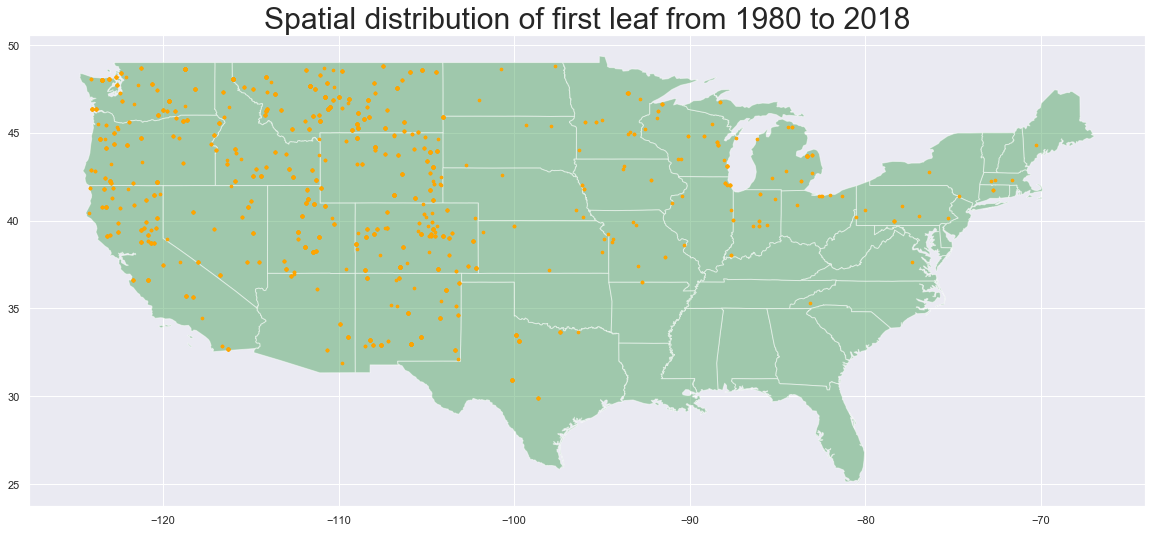

In [99]:
# x,y
gdf = gpd.GeoDataFrame(
    spa, geometry=gpd.points_from_xy(spa.Longitude, spa.Latitude))
# display the basemap
ax = main.plot(figsize=(20, 20), alpha=0.5, edgecolor='white',color='g',linewidth=1)
# display observational data on the basemap
gdf.plot(ax=ax,color='orange',markersize=7)
plt.rc('font', family='SimHei', size=18)
plt.title('Spatial distribution of first leaf from 1980 to 2018',size=30)
plt.savefig('lilac 1980-2018.png')
plt.show()

In [29]:
spa.head()

Latitude   Longitude  Individual_ID  Phenophase_ID  First_Yes_Year  \
1   47.219101 -113.634499          54651             76            1980   
5   39.087337 -111.132439           1643             76            1980   
10  38.508770 -111.883911           2194             76            1980   
13  48.020302 -123.477997          54970             76            1980   
17  46.467999 -110.512001           4160             76            1980   

    First_Yes_DOY  First_Yes_Month                     geometry  
1             115                4  POINT (-113.63450 47.21910)  
5             105                4  POINT (-111.13244 39.08734)  
10            110                4  POINT (-111.88391 38.50877)  
13             53                2  POINT (-123.47800 48.02030)  
17            117                4  POINT (-110.51200 46.46800)

## Temporal bias

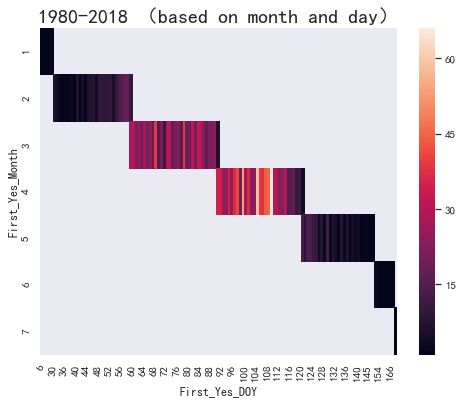

In [30]:
# 不同月份台风登陆时的强度等级
spa2 = spa.groupby(['First_Yes_Month','First_Yes_DOY'],as_index=False)['Phenophase_ID'].count()
spa2 = spa2.rename(columns={'Phenophase_ID':'Frequency'})
spa2plot = spa2.pivot('First_Yes_Month','First_Yes_DOY','Frequency')
plt.figure(figsize=(8,6))
sns.heatmap(spa2plot)
plt.title('1980-2018 （based on month and day）',size=20)
plt.show()

## Temporal cluster - k-means

In [31]:
# Data preparation 
cols2 = ['First_Yes_DOY','Elevation_in_Meters','AGDD','Accum_Prcp', 'Daylength','Phenophase_ID', 'Individual_ID']
tempk = df[cols2]
tempk=tempk.loc[tempk['Phenophase_ID']==76]

In [32]:
tempk.describe() # standard deviation

First_Yes_DOY  Elevation_in_Meters         AGDD   Accum_Prcp  \
count    2053.000000          2053.000000  2053.000000  2053.000000   
mean       90.503653          1132.222601 -9530.599732 -9531.641987   
std        23.304653           621.452634  2139.184315  2134.336592   
min         6.000000             1.000000 -9999.000000 -9999.000000   
25%        73.000000           652.000000 -9999.000000 -9999.000000   
50%        93.000000          1159.000000 -9999.000000 -9999.000000   
75%       108.000000          1595.000000 -9999.000000 -9999.000000   
max       185.000000          2927.000000  1717.000000  1035.000000   

          Daylength  Phenophase_ID  Individual_ID  
count   2053.000000         2053.0    2053.000000  
mean   -7358.830979           76.0   51774.436922  
std    12079.365301            0.0   13612.609496  
min    -9999.000000           76.0      60.000000  
25%    -9999.000000           76.0   55355.000000  
50%    -9999.000000           76.0   55549.000000  
75%    -9999.000000           76.0   55784.000000  
max    54605.000000           76.0   56074.000000

In [33]:
tempk.info() # check if it has null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2053 entries, 1 to 10348
Data columns (total 7 columns):
First_Yes_DOY          2053 non-null int64
Elevation_in_Meters    2053 non-null int64
AGDD                   2053 non-null float64
Accum_Prcp             2053 non-null int64
Daylength              2053 non-null int64
Phenophase_ID          2053 non-null int64
Individual_ID          2053 non-null int64
dtypes: float64(1), int64(6)
memory usage: 128.3 KB


In [34]:
temp = tempk.iloc[:,0:-2]

In [35]:
# scale the continuous features to get equal importance to all features

mms = MinMaxScaler()
mms.fit(temp)
temp_transformed = mms.transform(temp)

In [36]:
# find an optimal K use a elbow method
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(temp_transformed)
    Sum_of_squared_distances.append(km.inertia_)

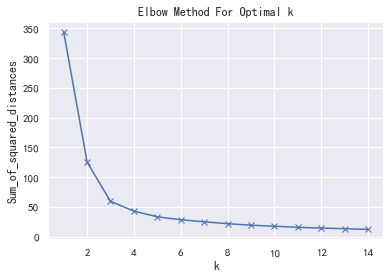

In [37]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [38]:
# find an optimal K use silhouette score
from sklearn.metrics import silhouette_score

ss = []
for k in range(2,15):
    kms = KMeans(n_clusters=k).fit(temp_transformed)
    labels = kms.labels_
    ss = silhouette_score(temp_transformed,labels, metric = 'euclidean')
    print("The number of cluster is: {}, its silhouette score is: {}".format(k,ss))

The number of cluster is: 2, its silhouette score is: 0.8103769550026403
The number of cluster is: 3, its silhouette score is: 0.47434295969270124
The number of cluster is: 4, its silhouette score is: 0.4089207274463552
The number of cluster is: 5, its silhouette score is: 0.42564409458870933
The number of cluster is: 6, its silhouette score is: 0.41035133643058874
The number of cluster is: 7, its silhouette score is: 0.40357234619627896
The number of cluster is: 8, its silhouette score is: 0.39027966545140425
The number of cluster is: 9, its silhouette score is: 0.37950940175452447
The number of cluster is: 10, its silhouette score is: 0.37637479825482717
The number of cluster is: 11, its silhouette score is: 0.3715995038157307
The number of cluster is: 12, its silhouette score is: 0.3665306380122481
The number of cluster is: 13, its silhouette score is: 0.3762975689698795
The number of cluster is: 14, its silhouette score is: 0.38314838130673134


In [87]:
# K-means
from sklearn import cluster

clu = KMeans(n_clusters=3)
pred = clu.fit_predict(temp_transformed)
pred

array([0, 0, 0, ..., 2, 2, 2])

In [89]:
r1=pd.Series(clu.labels_).value_counts() # number of observations in each cluster
'''
0    1087
1     872
2      94
'''

'\n0    1087\n1     872\n2      94\n'

In [90]:
r2=pd.DataFrame(clu.cluster_centers_)
r2

0         1             2             3             4
0  0.515262  0.549930 -4.163336e-16  9.159340e-16  3.816392e-16
1  0.408782  0.196423  1.942890e-16  7.702172e-16  3.538836e-16
2  0.560086  0.262300  8.731701e-01  9.250768e-01  8.925518e-01

In [91]:
# print the resluts 
r=pd.concat([r2,r1],axis=1)
r.columns = list(temp.columns) + [u'n_cluster']
r

First_Yes_DOY  Elevation_in_Meters          AGDD    Accum_Prcp  \
0       0.515262             0.549930 -4.163336e-16  9.159340e-16   
1       0.408782             0.196423  1.942890e-16  7.702172e-16   
2       0.560086             0.262300  8.731701e-01  9.250768e-01   

      Daylength  n_cluster  
0  3.816392e-16       1087  
1  3.538836e-16        872  
2  8.925518e-01         94

In [92]:
# output the original data and its variables in details 
r = pd.concat([tempk, pd.Series(clu.labels_, index = temp.index)], axis = 1)  
r.columns = list(tempk.columns) + [u'cluster'] # rename field name

In [93]:
r

First_Yes_DOY  Elevation_in_Meters     AGDD  Accum_Prcp  Daylength  \
1                115                 1638 -9999.00       -9999      -9999   
5                105                 1805 -9999.00       -9999      -9999   
10               110                 2111 -9999.00       -9999      -9999   
13                53                  768 -9999.00       -9999      -9999   
17               117                  445 -9999.00       -9999      -9999   
22                69                 1524 -9999.00       -9999      -9999   
27                52                 1348 -9999.00       -9999      -9999   
32                73                 1085 -9999.00       -9999      -9999   
37                97                 1278 -9999.00       -9999      -9999   
42                65                  388 -9999.00       -9999      -9999   
46                60                  640 -9999.00       -9999      -9999   
51                45                 1082 -9999.00       -9999      -9999   
56                71                   14 -9999.00       -9999      -9999   
61                79                  591 -9999.00       -9999      -9999   
65                57                  957 -9999.00       -9999      -9999   
69                57                  988 -9999.00       -9999      -9999   
74                58                  331 -9999.00       -9999      -9999   
79                82                  869 -9999.00       -9999      -9999   
84               115                 2098 -9999.00       -9999      -9999   
86                79                 1039 -9999.00       -9999      -9999   
91                80                 1296 -9999.00       -9999      -9999   
92                69                 1049 -9999.00       -9999      -9999   
97                60                  230 -9999.00       -9999      -9999   
102               66                   73 -9999.00       -9999      -9999   
107              101                 1517 -9999.00       -9999      -9999   
112               63                 1161 -9999.00       -9999      -9999   
117               33                  190 -9999.00       -9999      -9999   
122               54                  465 -9999.00       -9999      -9999   
127               86                  817 -9999.00       -9999      -9999   
132              108                 1735 -9999.00       -9999      -9999   
...              ...                  ...      ...         ...        ...   
9521             103                  211   252.50         348      47002   
9525             102                  173   245.25         274      46656   
9530             103                  186   256.00         277      47002   
9534              74                  176   372.50         357      41818   
9543             101                  209   295.00         286      46310   
9553             139                 1865   187.25         352      52877   
9567             135                  445   176.75         102      53222   
9572             123                  308   183.25          32      52186   
9577             109                  194   179.25         254      48384   
9582             110                  386    84.75         184      48730   
9584              93                  289   326.25         230      44928   
9588             126                  683   256.50         406      52531   
9590             139                 1595   195.50         284      53914   
9592             141                 1143   484.50          64      54605   
9594              73                 2049   296.75          12      42163   
9596              78                  171   209.00          49      42509   
9598             131                 2070   187.75         160      51149   
9601             119                 1067   143.25         168      50458   
9606             112                  999   220.50         143      48384   
9613             109                  999   217.50         265      48038   
961

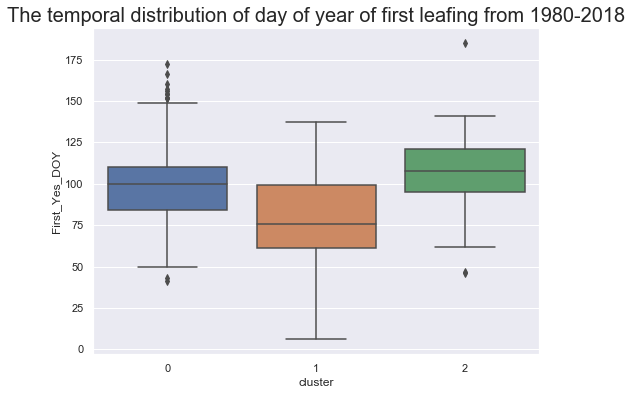

In [222]:
plt.figure(figsize=(8,6))
sns.boxplot(x='cluster',y='First_Yes_DOY',data=r)
plt.title('The temporal distribution of day of year of first leafing from 1980-2018',size=20)
plt.show()

## Choropleth Maps based on temporal cluster result

In [94]:
viztemp = r.join(spa, lsuffix='_caller', rsuffix='_other')

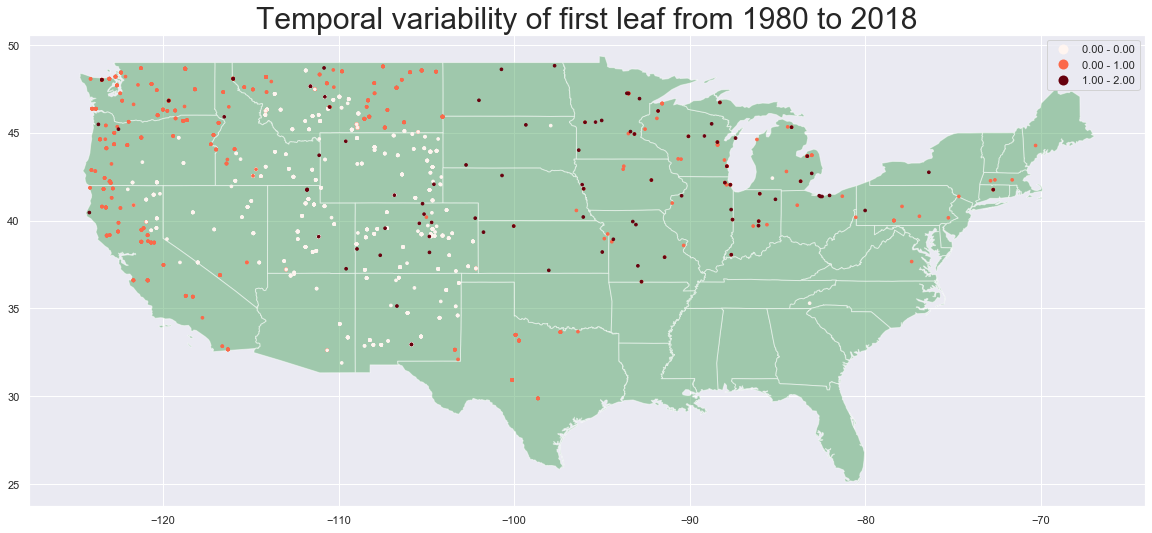

In [102]:
gdf = gpd.GeoDataFrame(
    viztemp, geometry=gpd.points_from_xy(viztemp.Longitude, viztemp.Latitude))
# display the basemap
ax = main.plot(figsize=(20, 20), alpha=0.5, edgecolor='white',color='g',linewidth=1)
# display observational data on the basemap
gdf.plot(ax=ax,cmap='Reds',scheme="quantiles",markersize=7,column='cluster',legend = True,
         k=3, figsize=(25, 15)
        )
plt.rc('font', family='SimHei', size=18)

plt.title('Temporal variability of first leaf from 1980 to 2018',size=30)
#plt.savefig('temporal variability.png')
plt.show()

## Spatial cluster within temporal clusters

In [207]:
spa_temp_cols= ['Latitude','Longitude','AGDD','Accum_Prcp','Elevation_in_Meters', 'Daylength','Phenophase_ID','Individual_ID']
spa_temp = df[spa_temp_cols]
spa_temp=spa_temp.loc[spa_temp['Phenophase_ID']==76]

In [208]:
spa_t = spa_temp.iloc[:,0:-2]

In [213]:
# scale the continuous features to get equal importance to all features
mms.fit(spa_t)
spa_temp_transformed = mms.transform(spa_t)
# spatial cluster
spa_clu = KMeans(n_clusters=3)
pred2 = spa_clu.fit_predict(spa_temp_transformed)
pred2

array([0, 1, 1, ..., 2, 2, 2])

In [214]:
# output the original data and its variables in details 
r_spa_temp = pd.concat([spa_temp, pd.Series(spa_clu.labels_, index = spa_t.index)], axis = 1)  
r_spa_temp.columns = list(spa_temp.columns) + [u'spatial_cluster'] # rename the field name

In [215]:
viz_spatemp = r_spa_temp.join(r, lsuffix='_caller', rsuffix='_other')

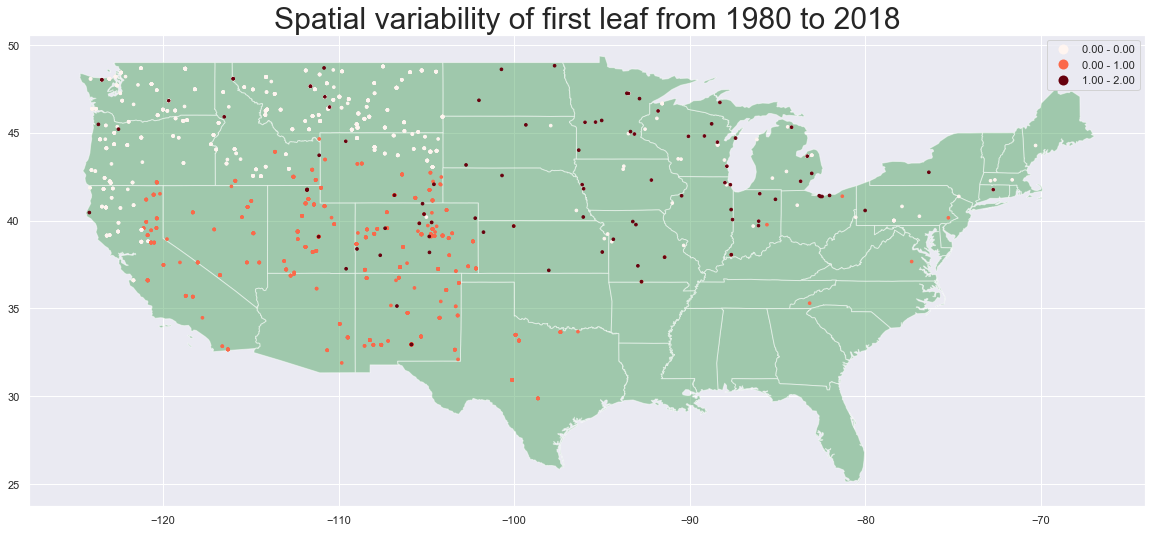

In [218]:
gdf = gpd.GeoDataFrame(
    viz_spatemp, geometry=gpd.points_from_xy(viz_spatemp.Longitude, viz_spatemp.Latitude))
# display the basemap
ax = main.plot(figsize=(20, 20), alpha=0.5, edgecolor='white',color='g',linewidth=1)
# display observational data on the basemap
gdf.plot(ax=ax,cmap='Reds',scheme="quantiles",markersize=7,column='spatial_cluster',legend = True,
         k=3, figsize=(25, 15)
        )
plt.rc('font', family='SimHei', size=18)

plt.title('Spatial variability of first leaf from 1980 to 2018',size=30)
#plt.savefig('temporal variability.png')
plt.show()

C:\Anaconda\lib\site-packages\mapclassify\classifiers.py:95: UserWarning: Warning: Not enough unique values in array to form k classes
  UserWarning)
C:\Anaconda\lib\site-packages\mapclassify\classifiers.py:96: UserWarning: Warning: setting k to 2
  Warn('Warning: setting k to %d' % k_q, UserWarning)


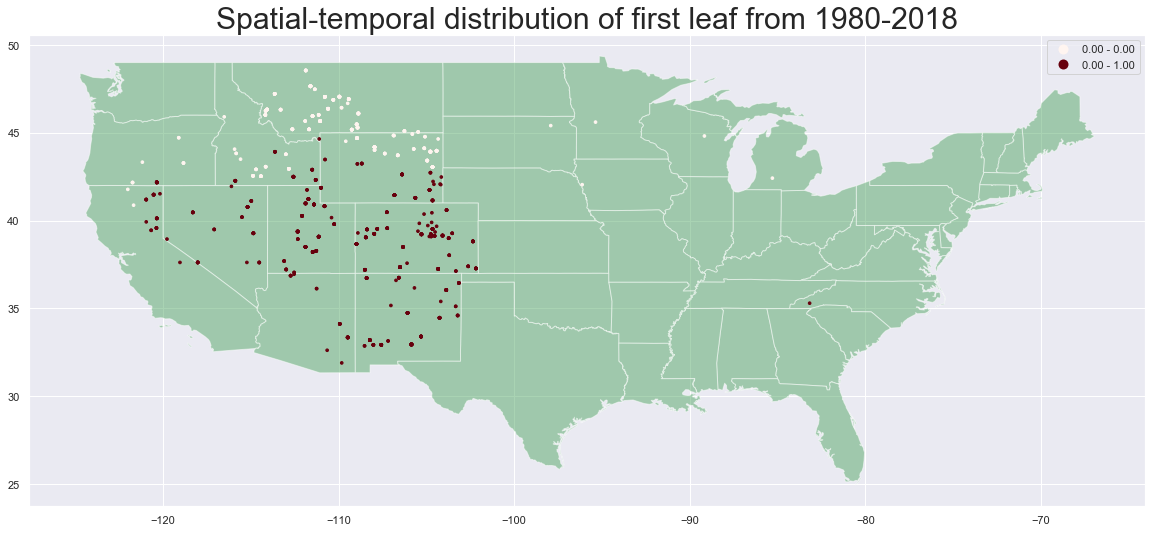

C:\Anaconda\lib\site-packages\mapclassify\classifiers.py:95: UserWarning: Warning: Not enough unique values in array to form k classes
  UserWarning)
C:\Anaconda\lib\site-packages\mapclassify\classifiers.py:96: UserWarning: Warning: setting k to 2
  Warn('Warning: setting k to %d' % k_q, UserWarning)


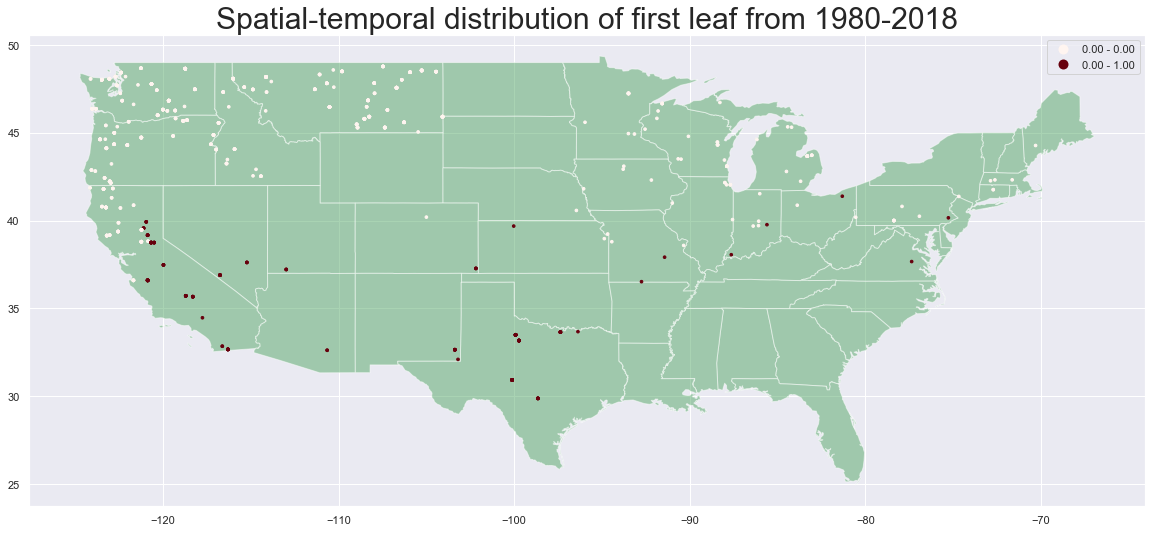

C:\Anaconda\lib\site-packages\mapclassify\classifiers.py:95: UserWarning: Warning: Not enough unique values in array to form k classes
  UserWarning)
C:\Anaconda\lib\site-packages\mapclassify\classifiers.py:96: UserWarning: Warning: setting k to 1
  Warn('Warning: setting k to %d' % k_q, UserWarning)
C:\Anaconda\lib\site-packages\mapclassify\classifiers.py:704: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam


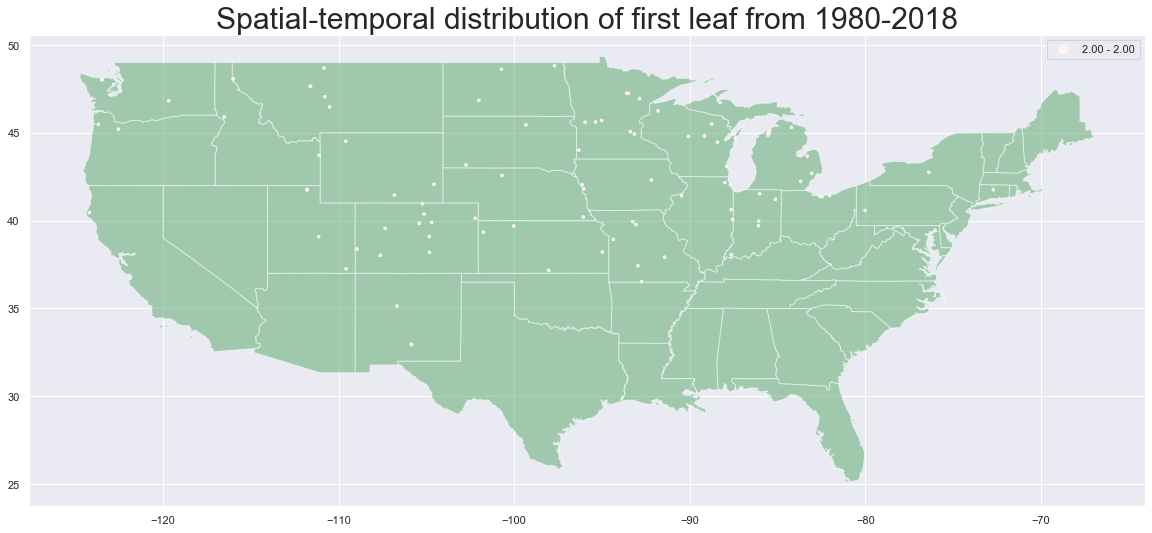

In [221]:
for i in range(0,3):  
    viz_spatemp_i = viz_spatemp.loc[viz_spatemp['cluster']== i]
    gdf = gpd.GeoDataFrame(
    viz_spatemp_i, geometry=gpd.points_from_xy(viz_spatemp_i.Longitude, viz_spatemp_i.Latitude))
    # display the basemap
    bsmap = main.plot(figsize=(20, 20), alpha=0.5, edgecolor='white',color='g',linewidth=1)
    # display observational data on the basemap
    gdf.plot(ax=bsmap,cmap='Reds',scheme="quantiles",markersize=7,column='spatial_cluster',legend = True,
         k=3, figsize=(25, 15))
    plt.title('Spatial-temporal distribution of first leaf from 1980-2018',size=30)
    plt.savefig('lilac in '+str(i)+'.png')
    plt.show()